BST test. Обзор данных. Постановка задачи - в файле ```BST_Задача_Моделирование_вкладов.docx```

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
df_in = pd.read_excel('../data/BST_DataSet.xlsx', parse_dates=True)
df_in.shape

/usr/local/lib/python3.7/site-packages/pandas/io/excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


(84, 11)

84 наблюдения, 12 признаков.

In [6]:
print(df_in.columns)

Index(['Прирост вкладов физических лиц в рублях (млн руб)',
       'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года',
       'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
       'Индекс потребительских цен, ед.', 'М0, руб', 'М2, руб',
       'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб'],
      dtype='object')


In [7]:
df_in

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
2011-01-01,-79049.000,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669
2011-02-01,180475.000,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680
2011-03-01,106845.000,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673
2011-04-01,224890.000,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519
2011-05-01,45856.000,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779
2011-06-01,227020.000,4.934762,8.25,2.60,4.20,113.76,108.894880,6.017200e+06,20721.900000,27.98,24137
2011-07-01,133756.000,4.777619,8.25,2.60,4.00,116.46,108.883990,6.151200e+06,20828.100000,27.90,23598
2011-08-01,10165.000,5.215217,8.25,2.60,4.10,110.08,108.622670,6.204500e+06,21061.900000,28.77,23051
2011-09-01,45398.000,5.873636,8.25,2.50,4.00,110.88,108.579220,6.303700e+06,21480.400000,30.49,23468
2011-10-01,17145.000,6.443810,8.25,2.90,4.50,109.47,109.100400,6.349700e+06,21366.700000,31.35,23602


Сохраним в csv на случай ad-hoc изменений (чтобы не пришлось устанавливать офисный пакет)

In [4]:
df_in = df_in.rename({'Unnamed: 0':'date', 'Прирост вкладов физических лиц в рублях (млн руб)':'delta', 
                   'Доходность ОФЗ по сроку до 1 года':'ofz_below_1y', 'Ключевая ставка':'k_rate',
                   'Ставка по вкладам в долларах до 1 года':'usd_below_1y', 'Ставка по вкладам в рублях до 1 года':'rur_below_1y',
                   'Нефть марки Юралс, долл./барр':'urals_price', 'Индекс потребительских цен, ед.':'buyer_prices_index',
                   'М0, руб':'m0', 'М2, руб':'m2', 'Курс доллара к рублю, руб':'usd_to_rur', 
                   'Номинальная средняя з/п, руб':'avg_payment'
                  }, axis = 1)

Собственно, они не заставили себя ждать. Одна из колонок не хочет переименовываться. Поменяем в блокноте.

In [5]:
df_in.to_csv('../data/BST_DataSet.csv', encoding='utf-8')

In [6]:
del(df_in)

К нашему сожалению, заказчик предоставляет только ```train```-выборку, остальные данные нужно добыть. 

- Данные по цене нефти Urals удалось найти только за последние полгода, остальные взяты из новостей про среднюю цену. 
- Данные индикаторов M0, M2 существуют (источник: ЦБ РФ), однако они не похожи на предоставленные заказчиком в проверочной выборке.
- Данные по обменному курсу доллара, вероятно, взяты заказчиком и нами из различных источников.

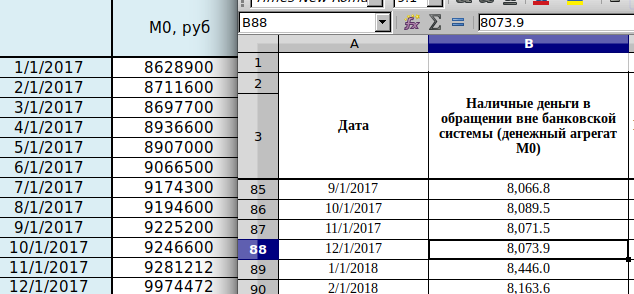

In [7]:
from IPython.display import Image
Image("../data/m0.png")

Прежде чем приступить к моделированию, бегло изучим статистики временного ряда.

In [197]:
df = pd.read_csv('../data/BST_DataSet.csv', encoding='utf-8')

In [198]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.index = df.date
del(df['date'])

In [10]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [11]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])


        plt.tight_layout()
    return 

ЦБ: задолженность физлиц по кредитам.

    - date
    - ruble (RUR)
        - all
        - estate
            - mortgage
            - mortgage_npl_all (Non-Performing Loan)
                - mortgage_under_ddu
                - mortgage_under_ddu_npl
    - non-ruble
        - all
        - estate
            - mortgage
            - mortgage_npl_all (Non-Performing Loan)
                - mortgage_under_ddu
                - mortgage_under_ddu_npl              

- All Russia
    - Federal District
        - State

In [131]:
df_dict = pd.read_excel('../data/supplementary_data/loans.xlsx', sheet_name=None)

In [180]:
rm_dict = {'Задолженность по кредитам, предоставленным физическим лицам': 'region',\
            "Unnamed: 1" : "rLoan", 'Unnamed: 2' : 'rEstate', \
           'Unnamed: 3' : 'rMortgage', 'Unnamed: 4' : 'rMortgage_npl', \
            'Unnamed: 5' : 'rMortgageDDU', 'Unnamed: 6' : 'rMortgageDDU_npl',\
            
           'Unnamed: 7' : 'uLoan', 'Unnamed: 8' : 'uEstate',\
           'Unnamed: 9' : 'uMortgage', 'Unnamed: 10' : 'uMortgage_npl', \
            'Unnamed: 11' : 'rMortgageDDU', 'Unnamed: 12' : 'rMortgageDDU_npl'}

In [201]:
date_format = '%d.%m.%Y'

In [202]:
def parseCBR(df_dict, rm_dict, date_format=None, print_shapes=False):
    df = pd.DataFrame()
    for date in df_dict:
            df1 = df_dict[date].copy()
            if print_shapes:
                print(df1.shape)
            df1 = df1.drop(range(0,7), axis=0)
            df1['date'] = date[12:]
            df = df.append(df1, sort=False)
            del(df1)

    df.rename(rm_dict, axis=1, inplace=True)
    if date_format:
        df.date = pd.to_datetime(df.date, format=date_format)
        df.index = df.date
        del(df['date'])
    return df

In [217]:
df_l = parseCBR(df_dict, rm_dict, date_format)

In [219]:
df_l = df_l[df_l['region'] == 'РОССИЙСКАЯ ФЕДЕРАЦИЯ'][['rLoan','rMortgage','rMortgage_npl', 'uLoan']]

In [220]:
df_l.to_csv('../data/loans_RF.csv', encoding='utf-8')

JOIN

In [221]:
df_m = pd.read_csv('../data/BST_DataSet+mine1.csv')

In [222]:
df_m.date = pd.to_datetime(df_m.date, format='%m/%d/%Y')
df_m.index = df_m.date
#del(df_m['date'])

In [223]:
df_j = df.join(df_l, on='date')

In [225]:
df_j.drop('Unnamed: 0', axis=1, inplace=True)

In [226]:
df_j.to_csv('../data/BST_DataSet+mine1+loans.csv', encoding='utf-8')

Моделированию посвящён отдельный ноутбук ```data-analysis.ipynb```. Обратимся далее к нему.